In [15]:
import pandas as pd
import geopandas as gpd
import re
import folium
from shapely.geometry import Point
from shapely import wkt
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data = pd.read_csv("/Users/yu/Desktop/Räumliche Analyse/code/query1.tsv", sep = "\t" , encoding = "utf-8")
data.columns = ["Straßenname", "Personname", "Gender","Koordination", "PLZ"]

In [51]:
# Check der Duplizierung
duplicates = data[data.duplicated(subset=['Straßenname'])]
if duplicates.empty:
    print("Es gibt keine duplizierte Straßenname.")
else:
    print(duplicates['Straßenname'])

33          Hans-Böhm-Straße
36          Senefelderstraße
85             Wüllnerstraße
117    Berthold-Haupt-Straße
157            Corinthstraße
               ...          
822      Heinz-Steyer-Straße
830             Goethestraße
841            Schillerplatz
894    Heinrich-Heine-Straße
896     Heinrich-Mann-Straße
Name: Straßenname, Length: 63, dtype: object


In [63]:
duplicate_streets_all = data[data.duplicated(subset=['Straßenname', 'Koordination'], keep= False)]
pd.set_option('display.max_rows', None)
print(duplicate_streets_all)
duplicate_streets_first = data[data.duplicated(subset=['Straßenname', 'Koordination'], keep='first')]

len(duplicate_streets_first)
total_street = data['Straßenname'].count()
final_street_number = total_street - len(duplicate_streets_all) + len(duplicate_streets_first)
final_street_number

                       Straßenname                        Personname  \
32                Hans-Böhm-Straße                 Jean Louis Nicodé   
33                Hans-Böhm-Straße                         Hans Böhm   
35                Senefelderstraße                  Alois Senefelder   
36                Senefelderstraße                  Alois Senefelder   
84                   Wüllnerstraße                     Franz Wüllner   
85                   Wüllnerstraße                     Franz Wüllner   
116          Berthold-Haupt-Straße                    Berthold Haupt   
117          Berthold-Haupt-Straße                    Berthold Haupt   
156                  Corinthstraße                     Lovis Corinth   
157                  Corinthstraße                     Lovis Corinth   
163                 Augustusbrücke                 August der Starke   
164                 Augustusbrücke                 August der Starke   
166            Emerich-Ambros-Ufer                    Emerich Am

899

In [53]:
# Deduplizierung
duplicate_rows = data[data.duplicated(subset=['Straßenname', 'Personname', 'Koordination'], keep=False)]
duplicate_rows_first = duplicate_rows.drop_duplicates(subset=['Straßenname', 'Personname', 'Koordination'], keep='first')
new_data = data.drop_duplicates(subset=['Straßenname', 'Personname', 'Koordination'], keep=False)
new_data = pd.concat([new_data, duplicate_rows_first], ignore_index=True)
name_trans_frau = new_data[new_data["Gender"] == "trans Frau"]
name_trans_frau

,Straßenname,Personname,Gender,Koordination,PLZ
881,Lili-Elbe-Straße,Lili Elbe,trans Frau,Point(13.767082 51.054398),1307


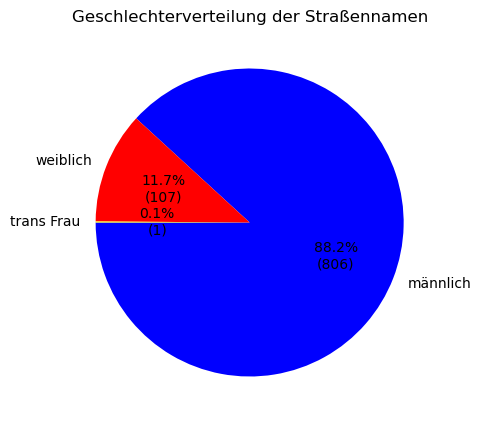

In [54]:
# Genderverteilung
gender_counts = new_data['Gender'].value_counts()
colors = ['blue', 'red', 'yellow']

plt.figure(figsize=(7,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*gender_counts.sum())})", startangle=900, colors=colors)
plt.title('Geschlechterverteilung der Straßennamen')
plt.show()

In [55]:
data2 = pd.read_csv("/Users/yu/Desktop/Räumliche Analyse/code/query2.tsv", sep = "\t" , encoding = "utf-8")
data2.columns = ["Straßenname", "Personname", "Gender", "Beruf", "Koordination", "PLZ"]
data2

,Straßenname,Personname,Gender,Beruf,Koordination,PLZ
0,Galileistraße,Galileo Galilei,männlich,Wissenschaftler,Point(13.709214 51.097461),1129
1,Galileistraße,Galileo Galilei,männlich,Astronom,Point(13.709214 51.097461),1129
2,Galileistraße,Galileo Galilei,männlich,Ingenieur,Point(13.709214 51.097461),1129
3,Galileistraße,Galileo Galilei,männlich,Astrologe,Point(13.709214 51.097461),1129
4,Galileistraße,Galileo Galilei,männlich,Physiker,Point(13.709214 51.097461),1129
...,...,...,...,...,...,...
3453,Helena-Rott-Straße,Helena Rott,weiblich,Sänger,Point(13.79491 50.991591),1239
3454,Helena-Rott-Straße,Helena Rott,weiblich,Musiker,Point(13.79491 50.991591),1239
3455,Jakob-Weinheimer-Straße,Jakob Weinheimer,männlich,Maler,Point(13.83574 51.12318),1465
3456,Albert-Venus-Weg,Franz Albert Venus,männlich,Maler,Point(13.82804 51.04984),1326


In [56]:
duplicate_rows = data2[data2.duplicated(subset=['Straßenname', 'Personname','Beruf', 'Koordination'], keep=False)]
duplicate_rows

,Straßenname,Personname,Gender,Beruf,Koordination,PLZ
54,Maxim-Gorki-Straße,Maxim Gorki,männlich,Schriftsteller,Point(13.729981 51.089055),1127
55,Maxim-Gorki-Straße,Maxim Gorki,männlich,Schriftsteller,Point(13.729981 51.089055),1129
56,Maxim-Gorki-Straße,Maxim Gorki,männlich,Dichter,Point(13.729981 51.089055),1127
57,Maxim-Gorki-Straße,Maxim Gorki,männlich,Dichter,Point(13.729981 51.089055),1129
58,Maxim-Gorki-Straße,Maxim Gorki,männlich,Politiker,Point(13.729981 51.089055),1127
...,...,...,...,...,...,...
3306,Wüllnerstraße,Franz Wüllner,männlich,Pianist,Point(13.712023 51.082292),1139
3307,Wüllnerstraße,Franz Wüllner,männlich,Hochschullehrer,Point(13.712023 51.082292),1127
3308,Wüllnerstraße,Franz Wüllner,männlich,Hochschullehrer,Point(13.712023 51.082292),1139
3309,Wüllnerstraße,Franz Wüllner,männlich,Musikpädagoge,Point(13.712023 51.082292),1127


In [57]:
new_data2 = data2.drop_duplicates(subset=['Straßenname', 'Personname', 'Beruf', 'Koordination'])
new_data2

,Straßenname,Personname,Gender,Beruf,Koordination,PLZ
0,Galileistraße,Galileo Galilei,männlich,Wissenschaftler,Point(13.709214 51.097461),1129
1,Galileistraße,Galileo Galilei,männlich,Astronom,Point(13.709214 51.097461),1129
2,Galileistraße,Galileo Galilei,männlich,Ingenieur,Point(13.709214 51.097461),1129
3,Galileistraße,Galileo Galilei,männlich,Astrologe,Point(13.709214 51.097461),1129
4,Galileistraße,Galileo Galilei,männlich,Physiker,Point(13.709214 51.097461),1129
...,...,...,...,...,...,...
3453,Helena-Rott-Straße,Helena Rott,weiblich,Sänger,Point(13.79491 50.991591),1239
3454,Helena-Rott-Straße,Helena Rott,weiblich,Musiker,Point(13.79491 50.991591),1239
3455,Jakob-Weinheimer-Straße,Jakob Weinheimer,männlich,Maler,Point(13.83574 51.12318),1465
3456,Albert-Venus-Weg,Franz Albert Venus,männlich,Maler,Point(13.82804 51.04984),1326


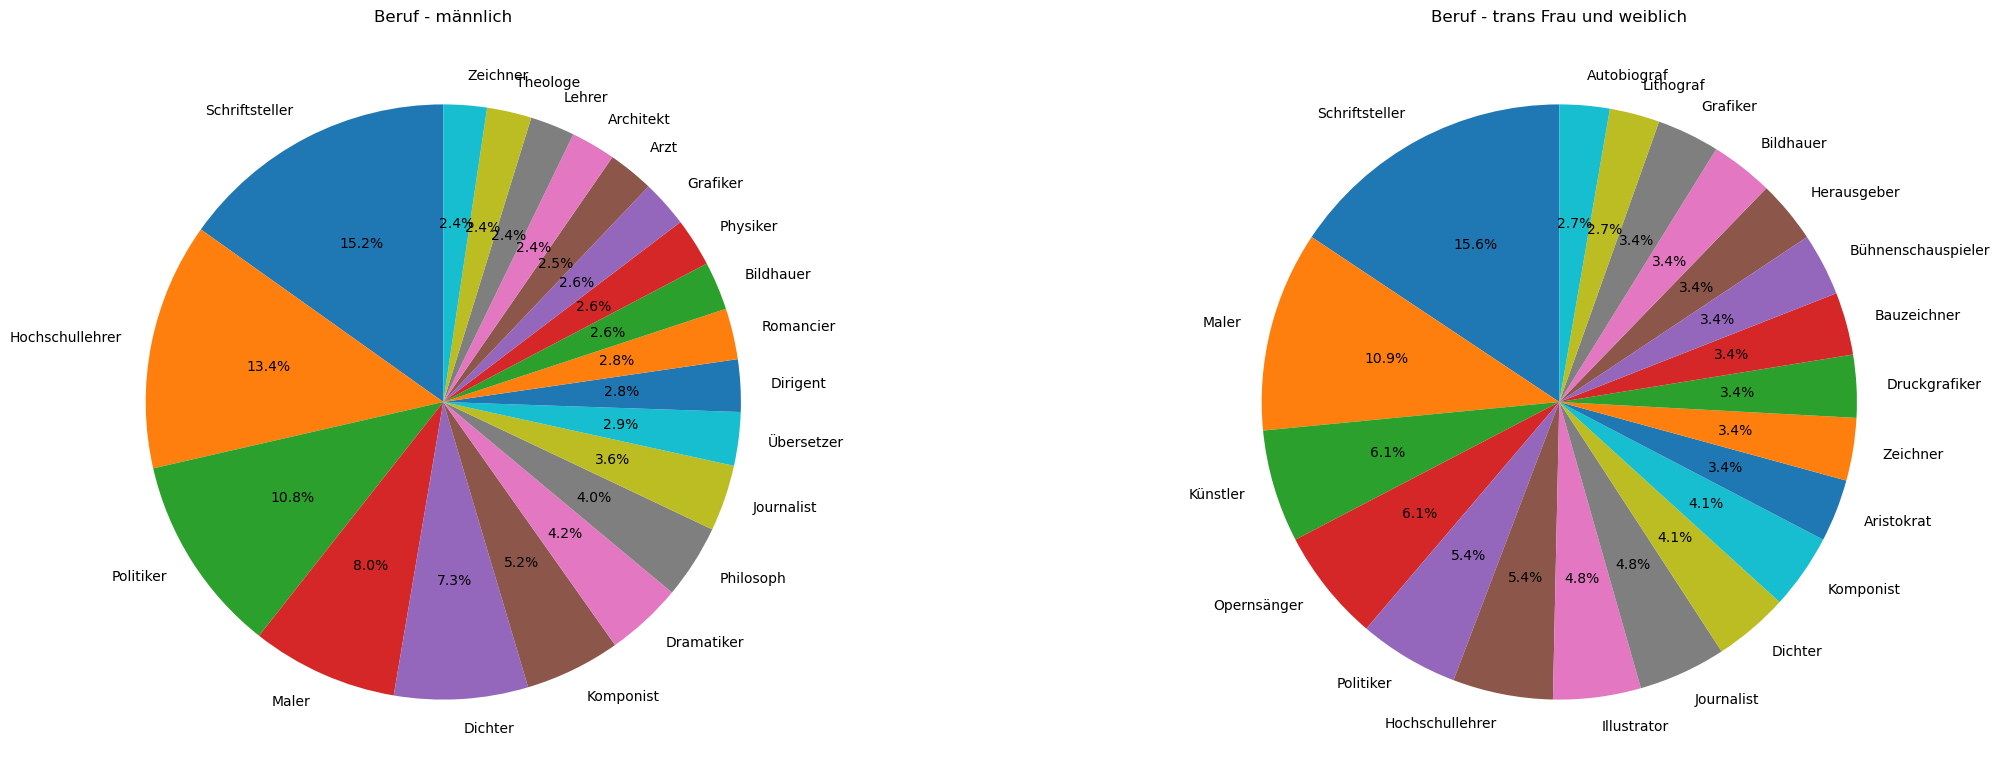

In [58]:

männlich_data = new_data2[new_data2['Gender'] == 'männlich']
männlich_counts = männlich_data['Beruf'].value_counts().head(20)
weiblich_data = new_data2[new_data2['Gender'].isin(['trans Frau', 'weiblich'])]
weiblich_counts = weiblich_data['Beruf'].value_counts().head(20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 14))
ax1.pie(männlich_counts, labels=männlich_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Beruf - männlich')
ax2.pie(weiblich_counts, labels=weiblich_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Beruf - trans Frau und weiblich')
plt.subplots_adjust(wspace=0.5)

plt.show()


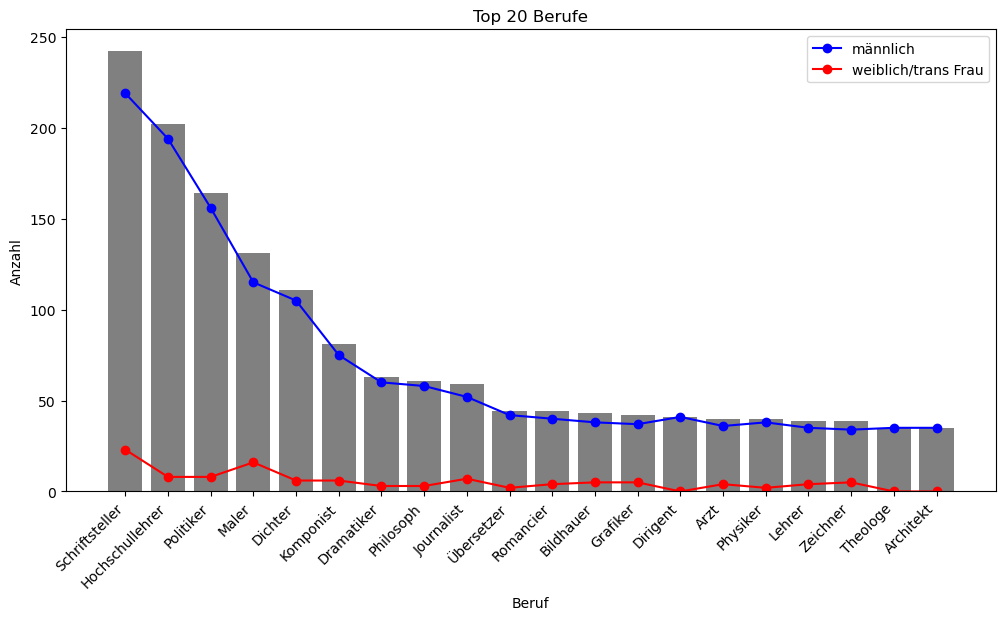

In [35]:
top_20_berufe = new_data2['Beruf'].value_counts().head(20)
top_20_berufe_m = new_data2[new_data2['Gender'] == 'männlich']['Beruf'].value_counts().reindex(top_20_berufe.index, fill_value=0)
top_20_berufe_wt = new_data2[new_data2['Gender'].isin(['trans Frau', 'weiblich'])]['Beruf'].value_counts().reindex(top_20_berufe.index, fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))
bar = ax.bar(top_20_berufe.index, top_20_berufe.values, color='gray')
line_m = ax.plot(top_20_berufe.index, top_20_berufe_m.values, color='blue', marker='o', label='männlich')
line_wt = ax.plot(top_20_berufe.index, top_20_berufe_wt.values, color='red', marker='o', label='weiblich/trans Frau')

ax.set_title('Top 20 Berufe')
ax.set_xlabel('Beruf')
ax.set_ylabel('Anzahl')

plt.xticks(rotation=45, ha='right')
ax.legend()
plt.show()


In [26]:
# Chi-Quadrat-Tests
cross_table = pd.crosstab(new_data2['Gender'],new_data2['Beruf'])
chi2, p_value, dof, expected = chi2_contingency(cross_table)

print("Chi-Quadrat-Wert:", chi2)
print("p-Wert:", p_value)
print("Freiheitsgrade:", dof)

NameError: name 'new_data2' is not defined

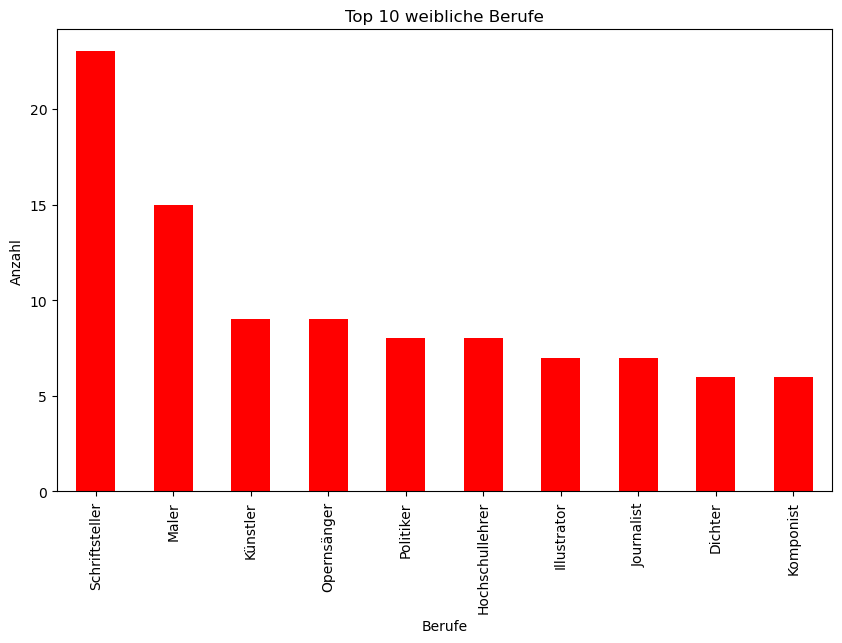

In [39]:
top_10_weiblich_occupations = new_data2[new_data2['Gender'] == 'weiblich']['Beruf'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_weiblich_occupations.plot(kind='bar', color='red')

plt.title('Top 10 weibliche Berufe')
plt.xlabel('Berufe')
plt.ylabel('Anzahl')
plt.show()


In [40]:
data3 = pd.read_csv("/Users/yu/Desktop/Räumliche Analyse/code/query3.tsv", sep = "\t" , encoding = "utf-8")
data3.columns = ["Straßenname", "Personname", "Gender", "Nationalität", "Koordination", "PLZ"]
data3

,Straßenname,Personname,Gender,Nationalität,Koordination,PLZ
0,Gaußstraße,Carl Friedrich Gauß,männlich,Rheinbund,Point(13.711208 51.087368),1139
1,Gaußstraße,Carl Friedrich Gauß,männlich,Königreich Hannover,Point(13.711208 51.087368),1139
2,Marie-Curie-Straße,Marie Curie,weiblich,Polen,Point(13.685482 51.073686),1139
3,Marie-Curie-Straße,Marie Curie,weiblich,Frankreich,Point(13.685482 51.073686),1139
4,Marie-Curie-Straße,Marie Curie,weiblich,Russisches Kaiserreich,Point(13.685482 51.073686),1139
...,...,...,...,...,...,...
1182,Gröbelstraße,Christian Ernst August Gröbel,männlich,Kurfürstentum Sachsen,Point(13.70227 51.04308),1159
1183,Waltherstraße,Hermann Walther,männlich,NaN,Point(13.7092 51.0567),1067
1184,Schoberstraße,Friedrich Immanuel Schober,männlich,NaN,Point(13.83654 51.02267),1279
1185,Michelangelostraße,Michelangelo,männlich,Republik Florenz,Point(13.74286 51.02214),1217


In [41]:
new_data3 = data3.drop_duplicates(subset=['Straßenname', 'Personname', 'Nationalität', 'Koordination'])
new_data3

,Straßenname,Personname,Gender,Nationalität,Koordination,PLZ
0,Gaußstraße,Carl Friedrich Gauß,männlich,Rheinbund,Point(13.711208 51.087368),1139
1,Gaußstraße,Carl Friedrich Gauß,männlich,Königreich Hannover,Point(13.711208 51.087368),1139
2,Marie-Curie-Straße,Marie Curie,weiblich,Polen,Point(13.685482 51.073686),1139
3,Marie-Curie-Straße,Marie Curie,weiblich,Frankreich,Point(13.685482 51.073686),1139
4,Marie-Curie-Straße,Marie Curie,weiblich,Russisches Kaiserreich,Point(13.685482 51.073686),1139
...,...,...,...,...,...,...
1182,Gröbelstraße,Christian Ernst August Gröbel,männlich,Kurfürstentum Sachsen,Point(13.70227 51.04308),1159
1183,Waltherstraße,Hermann Walther,männlich,NaN,Point(13.7092 51.0567),1067
1184,Schoberstraße,Friedrich Immanuel Schober,männlich,NaN,Point(13.83654 51.02267),1279
1185,Michelangelostraße,Michelangelo,männlich,Republik Florenz,Point(13.74286 51.02214),1217


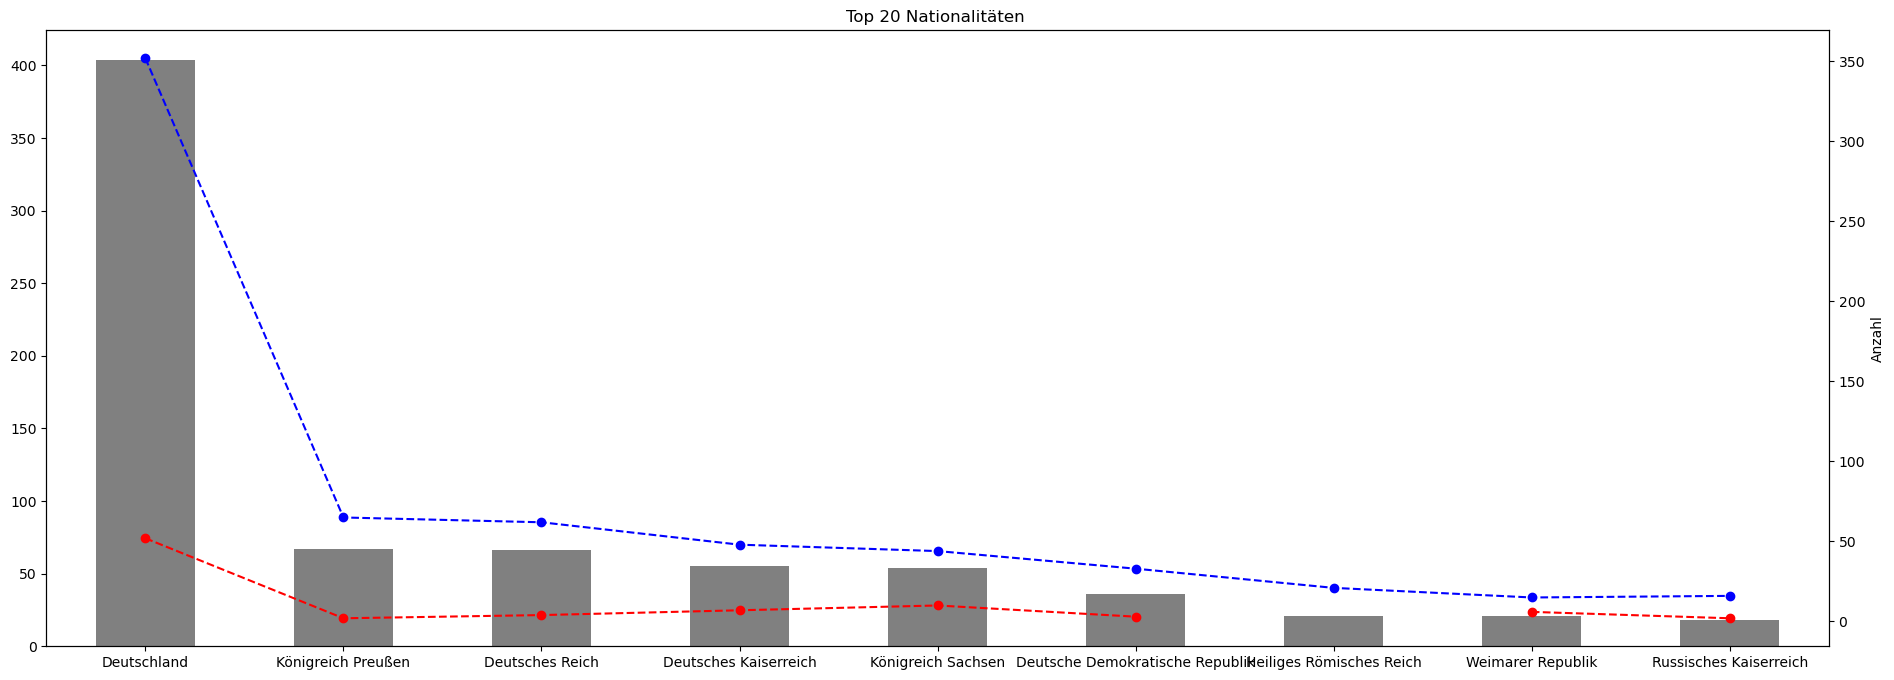

In [42]:
top_20_nationalities = new_data3['Nationalität'].value_counts().head(9)


plt.figure(figsize=(23, 8))
top_20_nationalities.plot(kind='bar', color='grey')


weiblich_trans_frau = new_data3[new_data3['Gender'].isin(['weiblich', 'trans Frau'])]['Nationalität'].value_counts().reindex(top_20_nationalities.index)
männlich = new_data3[new_data3['Gender'] == 'männlich']['Nationalität'].value_counts().reindex(top_20_nationalities.index)

weiblich_trans_frau.plot(secondary_y=True, color='red', linestyle='--', marker='o')
männlich.plot(secondary_y=True, color='blue', linestyle='--', marker='o')


plt.title('Top 20 Nationalitäten ')
plt.xlabel('Nationalität')
plt.ylabel('Anzahl')
plt.show()


In [43]:
# Chi-Quadrat-Tests
cross_table = pd.crosstab(new_data3['Gender'],new_data3['Nationalität'])
chi2, p_value, dof, expected = chi2_contingency(cross_table)

print("Chi-Quadrat-Wert:", chi2)
print("p-Wert:", p_value)
print("Freiheitsgrade:", dof)

NameError: name 'chi2_contingency' is not defined

In [44]:
# Funktion zum Bereinigen und Formatieren der Koordinaten
def clean_coordinate(coord):
    match = re.search(r'\((.*?)\)', coord)
    if match:
        coord = match.group(1)
    return 'POINT ({})'.format(coord)

# Bereinigung und Konvertierung der Koordinaten in die "geometry"-Spalte
new_data['Koordination'] = new_data['Koordination'].astype(str)
new_data['Koordination'] = new_data['Koordination'].apply(lambda coord: clean_coordinate(coord))
new_data['Koordination'] = new_data['Koordination'].apply(wkt.loads)

# Erstellen des GeoDataFrames
gdf = gpd.GeoDataFrame(new_data, geometry='Koordination', crs=4326)

In [45]:
name_w = new_data[~new_data["Gender"].str.contains("männlich", na=False)]
name_m = new_data[new_data["Gender"].str.contains("männlich", na=False)]

In [46]:
stadtbezirk = pd.read_csv("/Users/yu/Desktop/Räumliche Analyse/Postleitzahlgebiete.csv", sep = ";", encoding='utf-8')
stadtbezirk.head()

#die Werte in der Spalte geom trennen
stadtbezirk[["SRID", "geometry"]] = stadtbezirk["geom"].str.split(';', n=1, expand=True)

# Spalte "geometry" in Geometrieobjekte konvertieren
stadtbezirk['geometry'] = stadtbezirk['geometry'].apply(wkt.loads)

# GeoDataFrame erstellen
gdf = gpd.GeoDataFrame(stadtbezirk, geometry='geometry')

In [47]:
# Zusammenführen von Frauennamen-Straßendaten und Gebietsdaten anhand der Postleitzahl und des Stadtgebiets
merged_data_w = pd.merge(name_w, stadtbezirk, left_on='PLZ', right_on='plz', how='outer')

# Gruppieren nach Stadtgebiet und Postleitzahl, und Berechnen der Anzahl der Frauennamen-Straßen pro Gebiet
grouped_data_w = merged_data_w.groupby(['SRID', 'plz']).agg({'Straßenname': 'count'}).reset_index()
grouped_data_w = grouped_data_w.rename(columns={'Straßenname': 'AnzahlFrauenstraßen'})

# Zusammenführen von Männernamen-Straßendaten und Gebietsdaten anhand der Postleitzahl und des Stadtgebiets
merged_data_m = pd.merge(name_m, stadtbezirk, left_on='PLZ', right_on='plz', how='inner')

# Gruppieren nach Stadtgebiet und Postleitzahl, und Berechnen der Anzahl der Männernamen-Straßen pro Gebiet
grouped_data_m = merged_data_m.groupby(['SRID', 'plz']).agg({'Straßenname': 'count'}).reset_index()
grouped_data_m = grouped_data_m.rename(columns={'Straßenname': 'AnzahlMännerstraßen'})

# Zusammenführen der Anzahl der Frauennamen-Straßen und Männernamen-Straßen pro Gebiet
merged_data = pd.merge(grouped_data_w, grouped_data_m, on=['SRID', 'plz'], how='inner')

# Hinzufügen von geografischen Informationen pro Gebiet
merged_data = pd.merge(merged_data, stadtbezirk[['plz', 'geometry']], left_on='plz', right_on='plz', how='left')

# Berechnen der Gesamtanzahl der Straßen pro Gebiet (Anzahl der Frauennamen-Straßen + Anzahl der Männernamen-Straßen)
merged_data['GesamtAnzahlStraßen'] = merged_data['AnzahlFrauenstraßen'] + merged_data['AnzahlMännerstraßen']

# Berechnen des Anteils der Frauennamen-Straßen
merged_data['FemaleStreetsRatio'] = merged_data['AnzahlFrauenstraßen'] / merged_data['GesamtAnzahlStraßen']

# Ausgabe der Ergebnisse
print(merged_data)


         SRID   plz  AnzahlFrauenstraßen  AnzahlMännerstraßen  \
0   SRID=4326  1067                    6                   25   
1   SRID=4326  1069                    8                   65   
2   SRID=4326  1097                    7                   28   
3   SRID=4326  1099                   13                   27   
4   SRID=4326  1108                    0                   11   
5   SRID=4326  1109                    6                   26   
6   SRID=4326  1127                    2                   13   
7   SRID=4326  1129                    3                   27   
8   SRID=4326  1139                    2                   44   
9   SRID=4326  1156                    2                   15   
10  SRID=4326  1157                    2                   33   
11  SRID=4326  1159                    3                   33   
12  SRID=4326  1169                    3                    6   
13  SRID=4326  1187                    2                   17   
14  SRID=4326  1189      

NameError: name 'PercentFormatter' is not defined

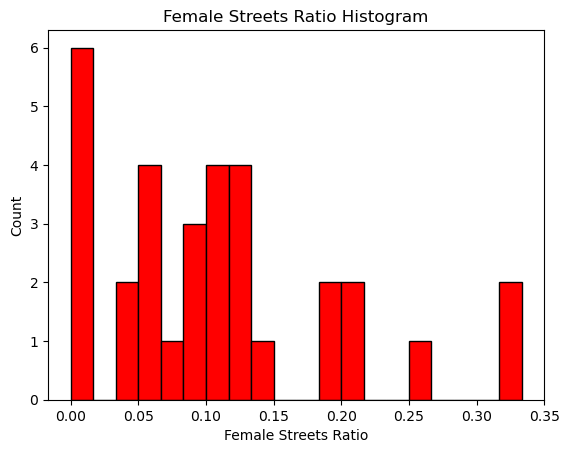

In [48]:
# Nach dem Wert von FemaleStreetsRatio die Farbe festlegen
merged_data.loc[merged_data['FemaleStreetsRatio'] == 0, 'color'] = '#ffffff'  # 白色
merged_data.loc[(merged_data['FemaleStreetsRatio'] > 0) & (merged_data['FemaleStreetsRatio'] < 0.05), 'color'] = '#ffeded'  # 浅红
merged_data.loc[(merged_data['FemaleStreetsRatio'] >= 0.05) & (merged_data['FemaleStreetsRatio'] < 0.1), 'color'] = '#ffccbf'  # 更深一点的红
merged_data.loc[(merged_data['FemaleStreetsRatio'] >= 0.1) & (merged_data['FemaleStreetsRatio'] < 0.15), 'color'] = '#ffad99'  # 更深一点的红
merged_data.loc[(merged_data['FemaleStreetsRatio'] >= 0.15) & (merged_data['FemaleStreetsRatio'] < 0.2), 'color'] = '#ff8c73'  # 更更深一点的红
merged_data.loc[(merged_data['FemaleStreetsRatio'] >= 0.2) & (merged_data['FemaleStreetsRatio'] < 0.25), 'color'] = '#ff6c4d'  # 更更更深一点的红
merged_data.loc[(merged_data['FemaleStreetsRatio'] >= 0.25) & (merged_data['FemaleStreetsRatio'] < 0.3), 'color'] = '#ff4d27'  # 更更更更深一点的红
merged_data.loc[merged_data['FemaleStreetsRatio'] >= 0.3, 'color'] = '#ff0000'  # 最深红色
# Zeichnen des Histogramms und Festlegen der Farbe auf Rot
plt.hist(merged_data['FemaleStreetsRatio'], bins=20, edgecolor='black', color='red')

# Festlegen des Titels und der Achsenbeschriftungen des Diagramms
plt.title('Female Streets Ratio Histogram')
plt.xlabel('Female Streets Ratio')
plt.ylabel('Count')

# Formatieren der x-Achse als Prozentwert
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1))

# Anzeigen des Diagramms
plt.show()

In [49]:
# Filtern der Bezirke, die einen Anteil von mehr als 20% haben
filtered_data = merged_data[merged_data['FemaleStreetsRatio'] > 0.2]
district_plz = filtered_data['plz']

# Zusammenführen der Daten basierend auf gleicher PLZ
merged_name_w = pd.merge(name_w, district_plz, left_on='PLZ', right_on='plz', how='inner')

# Ausgabe der fusionierten Tabelle
print(merged_name_w)

                 Straßenname                     Personname    Gender  \
0                Marienallee        Maria Anna von Portugal  weiblich   
1              Bettinastraße              Bettina von Arnim  weiblich   
2    Charlotte-Bühler-Straße               Charlotte Bühler  weiblich   
3           Charlottenstraße         Charlotte von Schiller  weiblich   
4              Louisenstraße  Maria Luisa von Bourbon-Parma  weiblich   
5           Katharinenstraße      Katharina von Mecklenburg  weiblich   
6             Angelikastraße             Angelika Kauffmann  weiblich   
7      Elisabeth-Boer-Straße                 Elisabeth Boer  weiblich   
8       Melitta-Bentz-Straße                  Melitta Bentz  weiblich   
9         Toni-Sender-Straße                    Tony Sender  weiblich   
10               Klarastraße                 Clara Schumann  weiblich   
11             Judeichstraße                 Helene Judeich  weiblich   
12        Julie-Salinger-Weg                 Julie 

In [50]:
# Erstelle die Grundkarte
m = folium.Map(location=[51.050409, 13.737262], zoom_start=11)  # Koordinaten für Dresden


# Füge den Layer "weibliche Bezirke" hinzu
weibliche_bezirke_layer = folium.FeatureGroup(name='weibliche Bezirke')
for _, row in merged_data.iterrows():
    color = row['color']
    style = {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }
    folium.GeoJson(
        row['geometry'],
        style_function=lambda x, style=style: style,
        tooltip=f"PLZ: {row['plz']}<br>Weibliche Straßenanteil: {row['FemaleStreetsRatio']*100:.2f}%"
    ).add_to(weibliche_bezirke_layer)
m.add_child(weibliche_bezirke_layer)


# Füge den Layer "Name_w" hinzu
name_w_layer = folium.FeatureGroup(name='Name_w-Straßen')
for _, row in name_w.iterrows():
    folium.CircleMarker(
        location=[row['Koordination'].y, row['Koordination'].x],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        tooltip=f"Straßenname: {row['Straßenname']}<br>Personenname: {row['Personname']}"
    ).add_to(name_w_layer)
m.add_child(name_w_layer)


# Füge den Layer "Name_m" hinzu
name_m_layer = folium.FeatureGroup(name='Name_m-Straßen')
for _, row in name_m.iterrows():
    folium.CircleMarker(
        location=[row['Koordination'].y, row['Koordination'].x],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        tooltip=f"Straßenname: {row['Straßenname']}<br>Personenname: {row['Personname']}"
    ).add_to(name_m_layer)
m.add_child(name_m_layer)


# Füge die Layer-Control-Option hinzu
folium.LayerControl().add_to(m)

# Erstelle die Legende
legend_html = """
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 130px; height: 240px;
    border: 2px solid grey; z-index: 9999; font-size: 14px;
    background-color: white; opacity: 0.8;
    ">
    <p style="margin: 5px 10px; font-weight: bold;">Legende</p>
    <p style="margin: 5px 10px;"><span style="background-color: #ffffff; width: 20px; height: 10px; display: inline-block;"></span> 0%</p>
    <p style="margin: 5px 10px;"><span style="background-color: #ffeded; width: 20px; height: 10px; display: inline-block;"></span> 0-5%</p>
    <p style="margin: 5px 10px;"><span style="background-color: #ffccbf;width: 20px; height: 10px; display: inline-block;"></span> 5-10%</p>
    <p style="margin: 5px 10px;"><span style="background-color: #ffad99; width: 20px; height: 10px; display: inline-block;"></span> 10-15%</p>
    <p style="margin: 5px 10px;"><span style="background-color: #ff8c73; width: 20px; height: 10px; display: inline-block;"></span> 15-20%</p>
    <p style="margin: 5px 10px;"><span style="background-color: #ff6c4d; width: 20px; height: 10px; display: inline-block;"></span> 20-25%</p>
    <p style="margin: 5px 10px;"><span style="background-color: #ff4d27; width: 20px; height: 10px; display: inline-block;"></span> 25-30%</p>
    <p style="margin: 5px 10px;"><span style="background-color: #ff0000; width: 20px; height: 10px; display: inline-block;"></span> >30%</p>
</div>
"""

# Füge die Legende zur Karte hinzu
m.get_root().html.add_child(folium.Element(legend_html))

# Zeige die Karte an
m
